In [3]:
import os
from pathlib import Path
import matplotlib.pyplot as plt

# Set working directory to the base directory 'gpudrive'
working_dir = Path.cwd()
while working_dir.name != 'gpudrive':
    working_dir = working_dir.parent
    if working_dir == Path.home():
        raise FileNotFoundError("Base directory 'gpudrive' not found")
os.chdir(working_dir)

from pygpudrive.env.config import EnvConfig, RenderConfig, SceneConfig
from pygpudrive.env.env_torch import GPUDriveTorchEnv

# Increase the resolution of the figure
plt.rcParams['figure.dpi'] = 50  # Higher DPI for better resolution

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
DYNAMICS_MODEL = "delta_local" # "delta_local" / "state" / "classic"
DATA_PATH = "data/processed/examples" 
MAX_NUM_OBJECTS = 32
NUM_ENVS = 4
# Configs
render_config = RenderConfig(draw_obj_idx=True)
scene_config = SceneConfig(path=DATA_PATH, num_scenes=NUM_ENVS)
env_config = EnvConfig(dynamics_model=DYNAMICS_MODEL)

In [6]:
#env_config.polyline_reduction_threshold = 0.2
#env_config.obs_radius = 60

env = GPUDriveTorchEnv(
    config=env_config,
    scene_config=scene_config,
    max_cont_agents=MAX_NUM_OBJECTS,
    device="cpu",
    render_config=render_config,
    action_type="continuous" # "continuous" or "discrete"
)

env.reset();

: 

In [1]:
# Plot a bird's eye view of the environment
fig = env.vis.plot_simulator_state(
    env_indices=[1],
    zoom_radius=90,
    #center_agent_indices=[1],
    time_steps=[0]
)

NameError: name 'env' is not defined

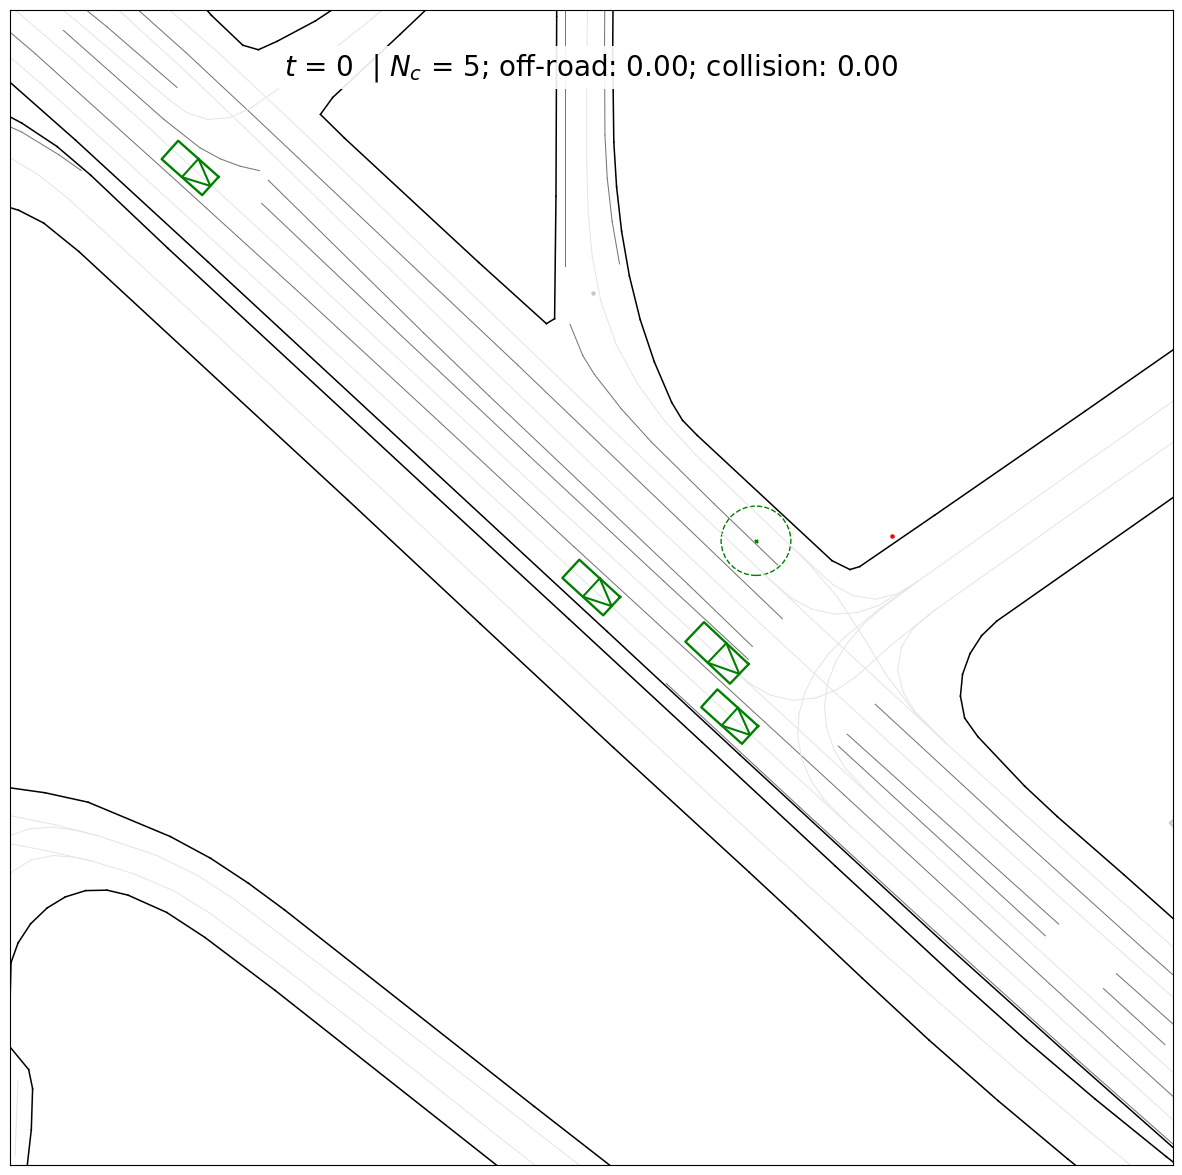

In [14]:
# Zoom in on a particular agent
fig = env.vis.plot_simulator_state(
    env_indices=[1],
    zoom_radius=50,
    center_agent_indices=[0],
    time_steps=[0]
)

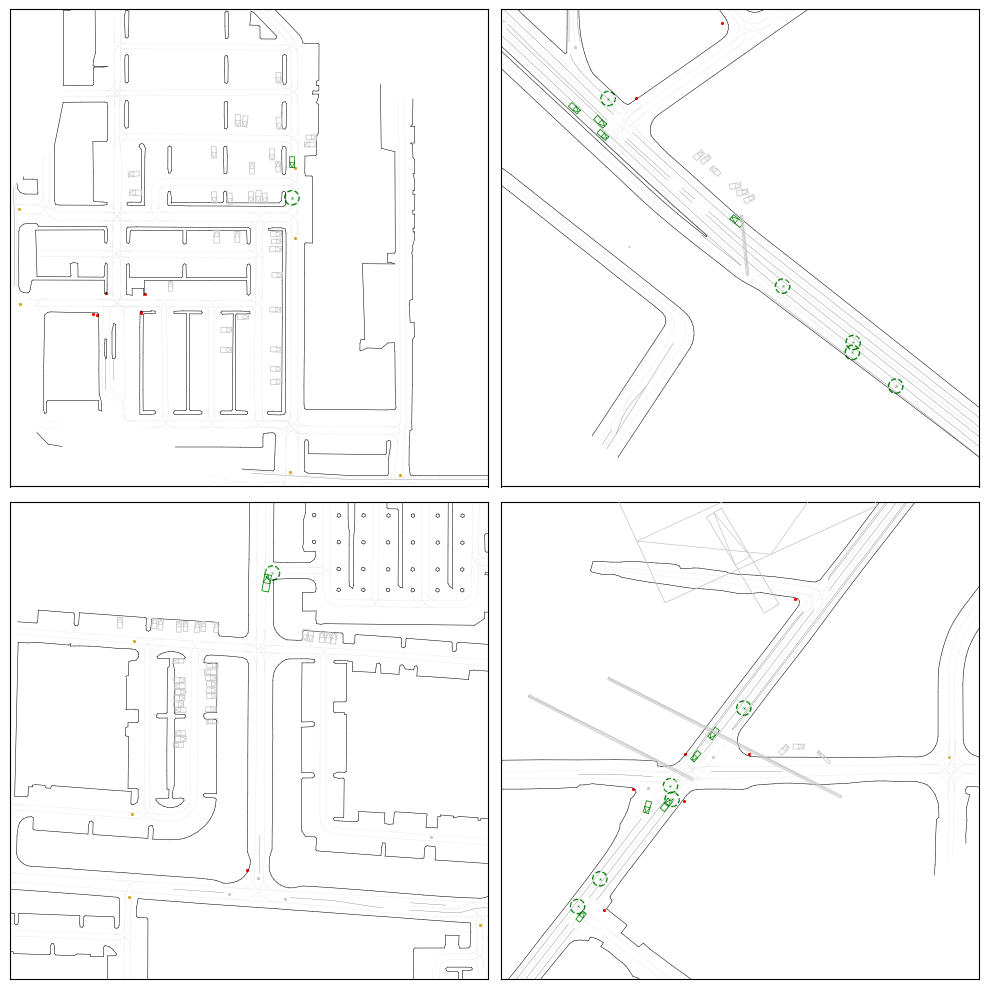

In [14]:
# Plot multiple scenes in a single figure
fig = env.vis.plot_simulator_state(
    figsize=(5, 5),
    env_indices=[0, 1, 2, 3],
    return_single_figure=True,
    zoom_radius=100
)

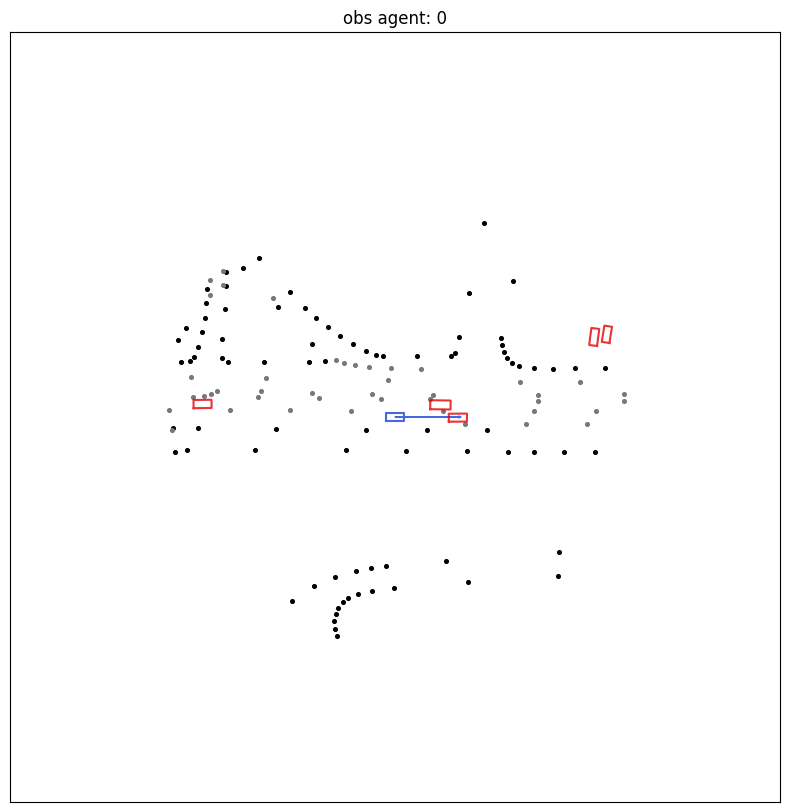

In [17]:
env.vis.plot_agent_observation(
    env_idx=1,
    agent_idx=0,
    figsize=(10, 10),
);